## Import Statements

In [52]:
from pathlib import Path
from multiprocessing import Pool

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

import sys
sys.path.insert(0, '..')
from SPOcc.spocc import loaders
from SPOcc.spocc import data as spd

## Functions

In [53]:
def get_features(sec):
    home = str(Path.home())
    data_file = home + '/mountpoint/dataproducts/db.v2.h5'
    
    scores = pd.read_hdf(data_file, f'S{sec}/scores')
    features = pd.read_hdf(data_file, f'S{sec}/features')
    features['score'] = scores

    return features

In [54]:
def get_train_test(data):
    junk_tics = [91924940, 234661768, 281897530, 153545882, 282051280, 153545868, 91863758, 50589230, 287769916, 31742413, 322895826, 119690108, 322895794, 119689919, 302761551, 281980550, 91922911, 281979571, 287957207, 281980466, 259543633, 31816351, 281980360, 47346711, 397186531, 119555751, 119689376, 119690511, 120381685, 134199361, 142105922, 142105969, 143143921, 146911567, 167303776, 167338401, 167362377, 176980088, 177022355, 219184692, 269205934, 269208586, 269273824, 269274274, 279319817, 280867759, 287957147, 322742255, 322897564, 427394477]
    var_tics = [387225893, 11295270, 149250423, 381975513, 100479926, 281853128, 370039101, 31473897, 271553990, 238230361, 153096567, 443418729, 138979820, 287532827, 234037006, 119364133, 149349182, 30928630, 271973253, 386320787, 365642947, 200518399, 317091666, 32929951, 442933194, 200515351, 438521908, 332919383, 427349922, 388935228, 50529755, 284283865, 200592903, 11286019, 276664304, 4352884, 50788340, 279578258, 200516548, 4357441, 427348371, 199898021, 200478060, 72921546, 762225404, 457250777, 92017453, 382144165, 40405809, 158733064]
    eb_tics = [263272042, 251238463, 141213462, 53328873, 67038755, 410901165, 283005536, 147260698, 235457825, 144542315, 151354333, 293776750, 247870021, 220025156, 234879341, 31403133, 143177176, 229306812, 80608317, 281803169, 24623945, 220241814, 52579544, 67192771, 234625764, 100509705, 100682066, 100682887, 102282850, 102405788, 102411949, 102541006, 102571243, 11293508, 11412481, 11693134, 117666617, 117765901, 117883206, 11807985, 11808371, 118929099, 119461300, 119549533, 12036808, 281804470, 282083645, 282263788, 282381271, 284999958]
    per_tics = [123946357, 201471185, 33744988, 124940750, 220620661, 33870427, 139423083, 231090784, 33874666, 140687857, 231091963, 33941261, 141126318, 231790332, 34365851, 141157802, 231800231, 34365969, 142611225, 231805614, 34378143, 148317391, 231808836, 34466051, 148321967, 231951543, 34790702, 148342995, 231958135, 34929515, 148466457, 232047765, 34937995, 149350586, 232423815, 34938006, 170399143, 234712270, 35233264, 176873028, 234844536, 35408680, 179304588, 32092813, 35710243, 192854871, 32930236, 4203621, 199752756, 32930996]
    dip_tics = [72828661, 11286045, 388935312, 72833961, 4357786, 11286071, 427395986, 11286063, 427377818, 158822738, 52209961, 436013289, 50530445, 459989537, 279640885, 388935622, 220322494, 206901502, 427377817, 158764834, 436159171, 302672869, 264541453, 309795677, 207045924, 159089190, 34397579, 457231768, 4206238, 349924407, 200639492, 317873721, 436248202, 200591757, 284158141, 302762301, 427400158, 427395634, 365643370, 427380721, 427334205, 200640498, 207017053, 24775707, 11197417, 264739659, 457251847, 457250759, 302830280, 144666684]
    
    data_tt = data.copy()
    data_tt['label'] = None
    
#     data_tt.loc[junk_tics, 'label'] = 'J'  # Junk
#     data_tt.loc[var_tics, 'label'] = 'V'  # Variable
#     data_tt.loc[eb_tics, 'label'] = 'E'  # Eclipsing Binary
#     data_tt.loc[per_tics, 'label'] = 'P'  # Periodic
#     data_tt.loc[dip_tics, 'label'] = 'D'  # Dipper
    
    data_tt.loc[junk_tics, 'label'] = 'N'  # Junk
    data_tt.loc[var_tics, 'label'] = 'N'  # Variable
    data_tt.loc[eb_tics, 'label'] = 'N'  # Eclipsing Binary
    data_tt.loc[per_tics, 'label'] = 'N'  # Periodic
    data_tt.loc[dip_tics, 'label'] = 'D'  # Dipper
    
    data_tt = data_tt.dropna(subset=['label'])
    
    return data_tt

In [55]:
def random_forest(data_l):
    labels = np.array(data_l['label'])
    data_ul = data_l.drop('label', axis = 1)
    features = list(data_ul.columns)
    
    x_train, x_test, y_train, y_test = train_test_split(data_ul, labels, test_size = 0.25, random_state = 0)
    
    rf = RandomForestClassifier(n_estimators = 16, random_state = 0)
    rf.fit(x_train, y_train)
    
    y_pred = rf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    
    feature_imp = pd.Series(rf.feature_importances_, index = features).sort_values(ascending = False)
    most_imp = feature_imp[feature_imp > 0.01]
    # print(most_imp.to_string())
    
    return rf

In [56]:
def get_pred(data, rf):
    data_p = pd.DataFrame()
    data_p['pred'] = rf.predict(data)

    confidence = rf.predict_proba(data)
    data_p['confidence'] = confidence[:, 0]

    data_p.index = list(data.index.values)
    
    return data_p

In [57]:
def get_lcs(sec, tics):
    data_dir = '/mnt/disks/DATA_DIR/tess-goddard-lcs/'

    ref = pd.read_csv(data_dir + f'sector{sec}lookup.csv').set_index('TIC_ID')
    subref = ref.loc[tics]
    files = data_dir + subref.Filename.values
    
    lcc = loaders.LightCurveCollection(sec=subref.Sector, cam=subref.Camera, files=files)
    
    lcc.useCpus = 1
    lcc.load_all_lcs()
    
    return lcc.lcs, subref

In [58]:
def make_graphs(lcs):
    i = 1
    
    for lc in lcs:
        print(i)
        time = np.asarray(lc.time.to_value('mjd', 'long'))
        flux = np.asarray(lc.flux)
        junk_mask1 = np.where((time > 58470) & (time < 58476), True, False)
        junk_mask2 = np.where((time > 58479) & (time < 58485), True, False)
        junk_mask = np.logical_or(junk_mask1, junk_mask2)
        time = time[junk_mask]
        flux = flux[junk_mask]
        
        plt.clf()
        plt.scatter(time, flux, s=5)
        plt.ylabel('Flux')
        plt.xlabel('Time [MJD]')
        plt.title(lc.label)
        fig_path = 'tess_figs/' + str(lc.label) + '.png'
        # plt.show()
        plt.savefig(fig_path, dpi=150, bbox_inches='tight')
        i += 1

In [59]:
def get_n(data):
    labels = np.array(data['label'])
    data_ul = data.drop('label', axis = 1)
    features = list(data_ul.columns)
    
    x_train, x_test, y_train, y_test = train_test_split(data_ul, labels, test_size = 0.25, random_state = 0)
    
    
    ns = []
    accs = []
    
    for n in range(1, 101):
        rf = RandomForestClassifier(n_estimators = n, random_state = 0)
        rf.fit(x_train, y_train)

        y_pred = rf.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(n, ' Accuracy: ', accuracy)

        ns.append(n)
        accs.append(accuracy)
    
    plt.plot(ns, accs)

## Main

In [60]:
sec = 6
data = get_features(sec)
data_l = get_train_test(data)

In [61]:
rf = random_forest(data_l)

Accuracy:  0.9365079365079365


In [11]:
data_p = get_pred(data, rf)

In [41]:
confident_mask = np.where(data_p['confidence'] > 0.6, True, False)
data_confident = data_p[confident_mask]

unique, counts = np.unique(data_confident['pred'], return_counts=True)
for i in range(0, len(unique)):
    print(unique[i], ':\t', counts[i])

D :	 712


In [45]:
data_dir = '/mnt/disks/DATA_DIR/tess-goddard-lcs/'
ref = pd.read_csv(data_dir + f'sector{sec}lookup.csv').set_index('TIC_ID')
subref = ref.loc[list(data_confident.index.values)]
files = data_dir + subref.Filename.values

lcc = loaders.LightCurveCollection(sec=subref.Sector, cam=subref.Camera, files=files)

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
lcc.normalize = False
with Pool(4) as p:
    lcs = p.map(lcc.load_cut_lc, [lcc.ref.iloc[i] for i in range(len(lcc.ref))], chunksize=25)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


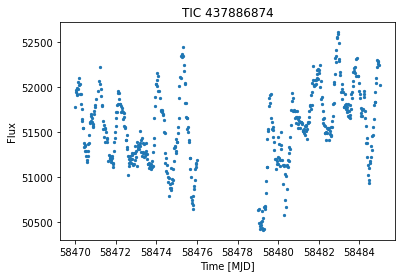

In [47]:
make_graphs(lcs)

In [91]:
# get_n(data_l)